Do your work for this exercise in a file named `regex`.

In [1]:
import pandas as pd
import re

1. Write a function named `is_vowel`. It should accept a string as input and use a regular expression to determine if the passed string is a vowel. While not explicity mentioned in the lesson, you can treat the result of `re.search` as a boolean value that indicates whether or not the regular expression matches the given string.

In [5]:
def is_vowel(string):
    """
    
    """
    vowel = r'[aeiouAEIOU]'
    if re.search(vowel, string):
        print('Is a vowel')
    else:
        print('NOT a vowel')
    

In [6]:
is_vowel("g")

NOT a vowel


In [7]:
is_vowel("E")

Is a vowel


In [10]:
is_vowel("A")

Is a vowel


In [12]:
def has_vowel(string):
    """
    
    """
    vowel = r'[aeiouAEIOU]'
    for s in string:
        if re.search(vowel, string):
            print('Has a vowel')
        else:
            print('DOES NOT have a vowel')

In [13]:
has_vowel("Amanda")

Is a vowel
Is a vowel
Is a vowel
Is a vowel
Is a vowel
Is a vowel


2. Write a function named `is_valid_username` that accepts a string as input. A valid username starts with a lowercase letter, and only consists of lowercase letters, numbers, or the `_` character. It should also be no longer than 32 characters. The function should return either `True` or `False` depending on whether the passed string is a valid username.

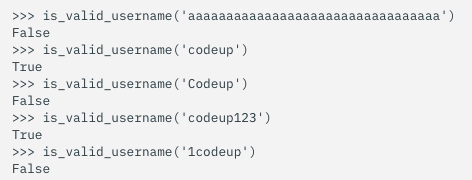

In [11]:
def is_valid_username():
    """
    
    """
    

SyntaxError: unexpected EOF while parsing (<ipython-input-11-3b1a50417a12>, line 1)

3. Write a regular expression to capture phone numbers. It should match all of the following:

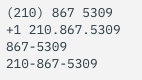

4. Use regular expressions to convert the dates below to the standardized year-month-day format.

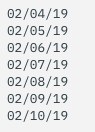

5. Write a regex to extract the various parts of these logfile lines:
`GET /api/v1/sales?page=86 [16/Apr/2019:193452+0000] HTTP/1.1 {200} 510348 "python-requests/2.21.0" 97.105.19.58
POST /users_accounts/file-upload [16/Apr/2019:193452+0000] HTTP/1.1 {201} 42 "User-Agent: Mozilla/5.0 (X11; Fedora; Fedora; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36" 97.105.19.58
GET /api/v1/items?page=3 [16/Apr/2019:193453+0000] HTTP/1.1 {429} 3561 "python-requests/2.21.0" 97.105.19.58`

6. **BONUS** You can find a list of words on your mac at `/usr/share/dict/words`. Use this file to answer the following questions:

- How many words have at least 3 vowels?
- How many words have at least 3 vowels in a row?
- How many words have at least 4 consonants in a row?
- How many words start and end with the same letter?
- How many words start and end with a vowel?
- How many words contain the same letter 3 times in a row?
- What other interesting patterns in words can you find?